Le clustering est la tâche de diviser la population d'un certain nombre de groupes.

Il s'agit essentiellement d'un type de méthode d'apprentissage non supervisé . Une méthode d'apprentissage non supervisé est une méthode dans laquelle nous tirons des références d'ensembles de données constitués de données d'entrée sans réponses étiquetées.

In [2]:
#importation des bib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
#Cet ensemble de données est basé sur les clients des centres commerciaux.
data=pd.read_csv("/Users/mohammedherrag/Downloads/Mall_Customers.csv" , index_col=[0])
data.head()


Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
           dtype='int64', name='CustomerID', length=200)

In [93]:
data.shape

(200, 4)

Il y a un total de 200 lignes et 5 colonnes dans cet ensemble de données.

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [95]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [96]:
data.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

on remarque n'existe pas des valeurs nulles dans l'ensemble de données.

### <font color='blue'>Corrélations en les différents attributs</font>

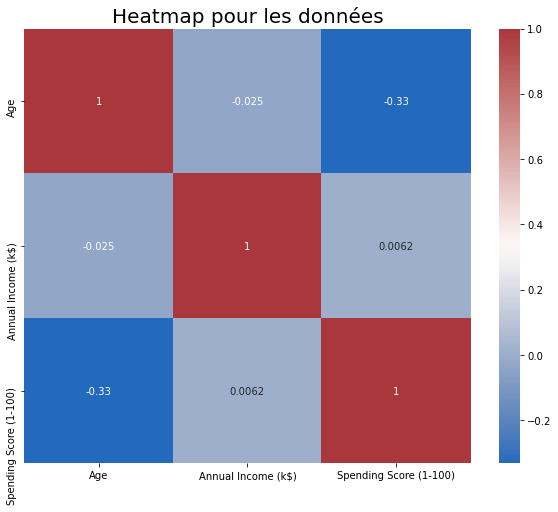

In [104]:
plt.figure(figsize=(10,8))
sns.heatmap(data[1:].corr(), cmap = 'vlag', annot = True)
plt.title('Heatmap pour les données', fontsize = 20)
plt.show()

Le graphique ci-dessus pour montrer la corrélation entre les différents attributs, tel que les caractéristiques les plus corrélées avec la couleur rouge et les caractéristiques les moins corrélées avec la couleur bleue.

Nous pouvons clairement voir que ces attributs n'ont pas une bonne corrélation entre eux.

### <font color='blue'>Ratio hommes/femmes et spending score/Genre</font>

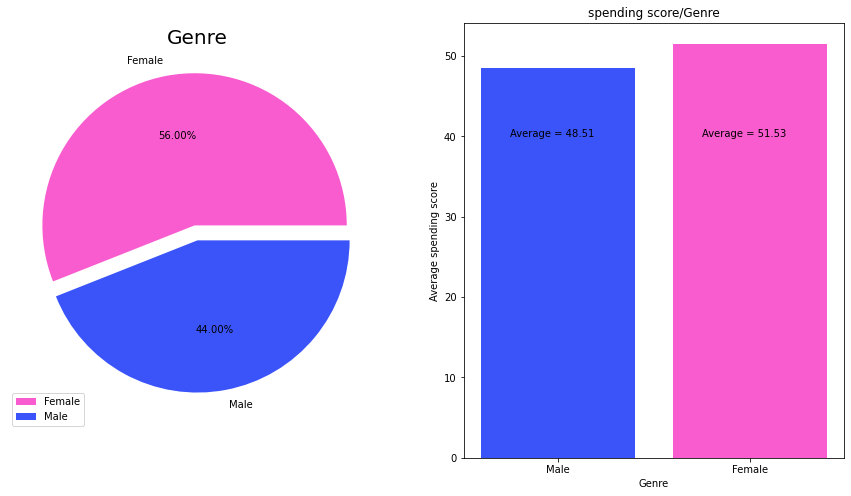

In [98]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.pie(data['Genre'].value_counts(),colors=['#F95CCF','#3A54FA'],explode = [0.1,0], labels = labels, autopct = '%.2f%%')
plt.title('Genre', fontsize = 20)
plt.legend()
plt.subplot(1,2,2)

male_avg_score = data[data.Genre == 'Male']['Spending Score (1-100)'].mean()
female_avg_score = data[data.Genre == 'Female']['Spending Score (1-100)'].mean()
plt.bar(x = ['Male' , 'Female'] , height = [male_avg_score , female_avg_score] , color = ['#3A54FA','#F95CCF'])
plt.title('spending score/Genre' )
plt.ylabel('Average spending score' )
plt.xlabel('Genre' )
plt.text(-.25 , 40 , 'Average = {:.2f}'.format(male_avg_score))
plt.text(.75 , 40 , 'Average = {:.2f}'.format(female_avg_score))
plt.show()

<ul>
<li>La première subplot montre que nos clientes féminines (56%) sont plus que nos clients masculins (44%).</li>
<li>La deuxième subplot secondaire montre également que nos clientes féminines (51.53) ont en moyenne un spending score plus élevé par rapport a nos clients masculins (48.51).</li>
</ul>    

/Users/mohammedherrag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


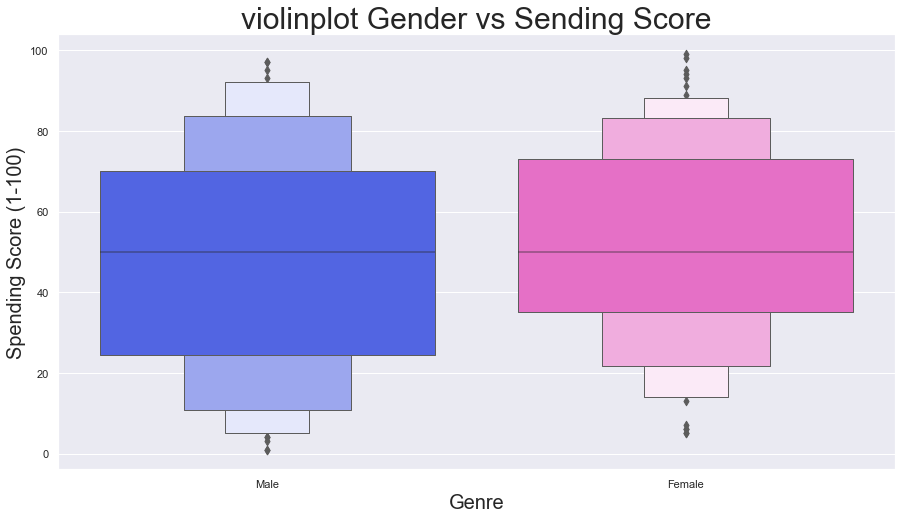

In [161]:
plt.figure(figsize=(15,8))
sns.boxenplot(data['Genre'], data['Spending Score (1-100)'], 
               palette = ['#3A54FA','#F95CCF'])
plt.title('violinplot Gender vs Sending Score', fontsize = 30)
plt.xlabel('Genre',fontsize = 20)
plt.ylabel('Spending Score (1-100)',fontsize = 20)
plt.show()

Il est clairement visible que la plupart des hommes ont un Spending Score d'environ 25 à 70 , tandis que les femmes ont un Spending Score d'environ 35 à 75. ce qui indique que le degré de dépense pour les fammes est plus grand que les hommes.

### <font color="blue"> violins-plots </font>

/Users/mohammedherrag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


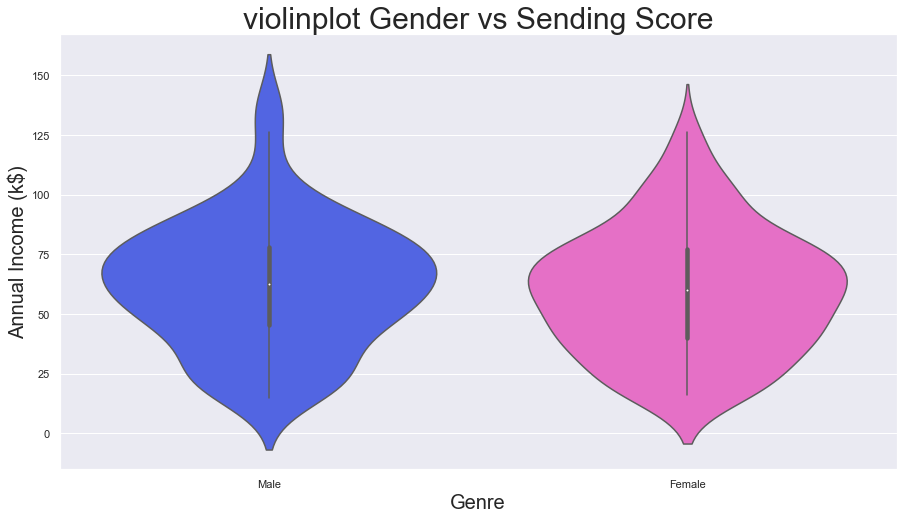

In [159]:
plt.figure(figsize=(15,8))
sns.violinplot('Genre', 'Annual Income (k$)', data=data ,
               palette = ['#3A54FA','#F95CCF'])
plt.title('violinplot Gender vs Sending Score', fontsize = 30)
plt.xlabel('Genre',fontsize = 20)
plt.ylabel('Annual Income (k$)',fontsize = 20)
plt.show()

On voit que la forme générale et la distribution des pointes sont similaires pour les deux sexes, mais il y a plus de valeurs aberrantes dans le cas des hommes.

nous pouvons voir qu'il y a plus d'hommes qui sont payés plus que de femmes. Mais, le nombre d'hommes et de femmes est égal en nombre lorsqu'il s'agit de faible revenu annuel.

### <font color='blue'>Répartition par âge </font>

/Users/mohammedherrag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


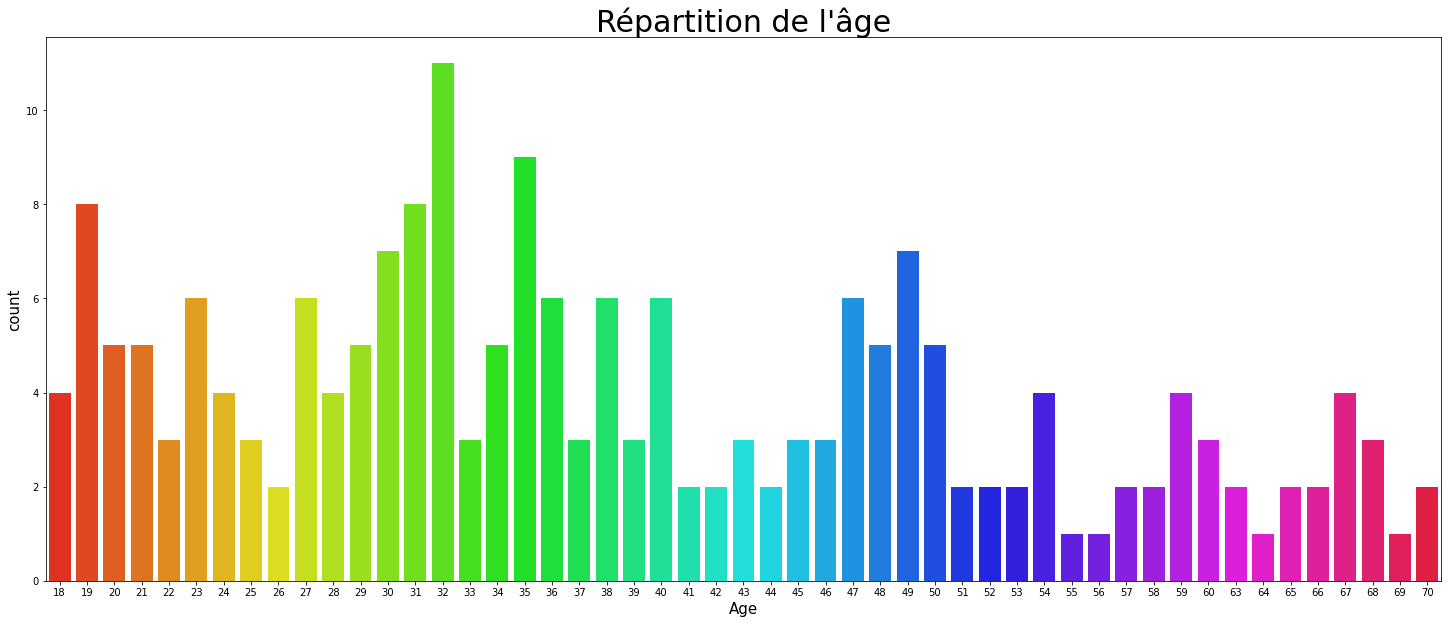

In [100]:
plt.figure(figsize=(25,10))
plt.title("Répartition de l'âge", fontsize = 30)
sns.countplot(data['Age'], palette = 'hsv')
plt.xlabel('Age',fontsize = 15)
plt.ylabel('count',fontsize = 15)
plt.show()

Ce graphique montre un graphique plus interactif sur la répartition de chaque groupe d'âge dans le centre commercial pour plus de clarté sur le groupe d'âge des visiteurs dans le centre commercial.

on peut voir que les âges de 27 à 40 ans sont très fréquents mais il n'y a pas de modèle clair (pour 33 , 37 et 39 ans) et  les groupes d'âge plus âgés sont moins fréquents en comparaison.

plus Précisément on trouve les personnes de 55, 56, 64, 69 ans sont très moins fréquentes dans les Centres commerciaux et les personnes de 32 ans sont les visiteurs les plus fréquents du centre commercial.

### <font color='blue'>Répartition Spending Score</font>

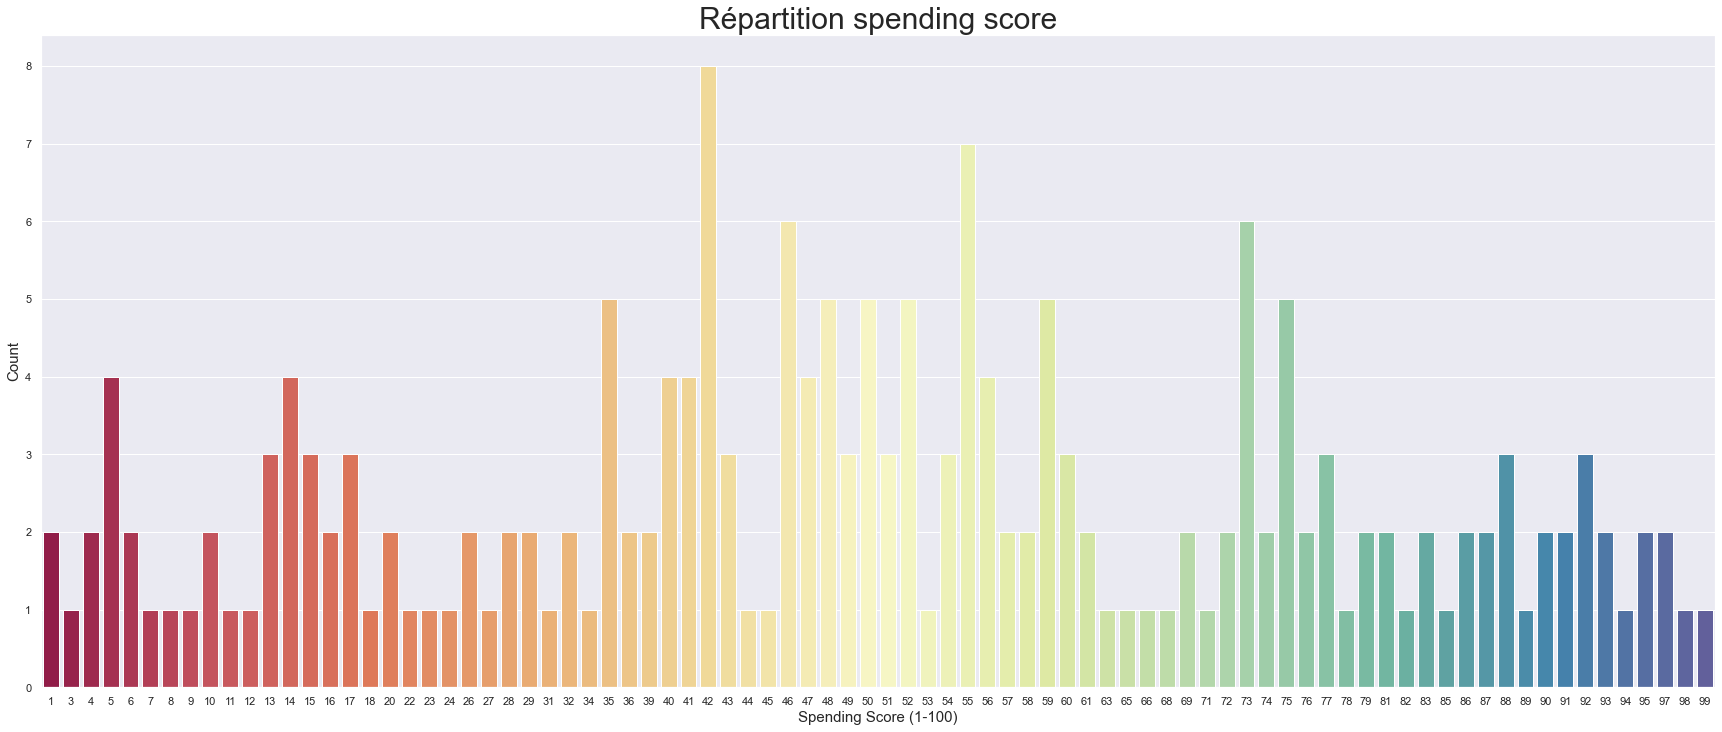

In [137]:
plt.figure(figsize=(30,12))
sns.countplot( x = "Spending Score (1-100)", data = data, palette="Spectral")
plt.title("Répartition spending score",fontsize=30)
plt.xlabel("Spending Score (1-100)",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

Le graphique ci-dessus est le plus important dans la perspective du centre commercial, car il est très important d'avoir une intuition et une idée du spending score des clients visitant le centre commercial.

D'un point de vue général, nous pouvons conclure que la plupart des clients ont un score de dépenses compris entre 35 et 60.

il existe pas mal des client ont un spending score >90 qui implique que le centre commercial s'adresse à une variété de clients ayant des besoins et des exigences variables disponibles dans le centre commercial.

### <font color='blue'>Âge vs revenu annuel</font>

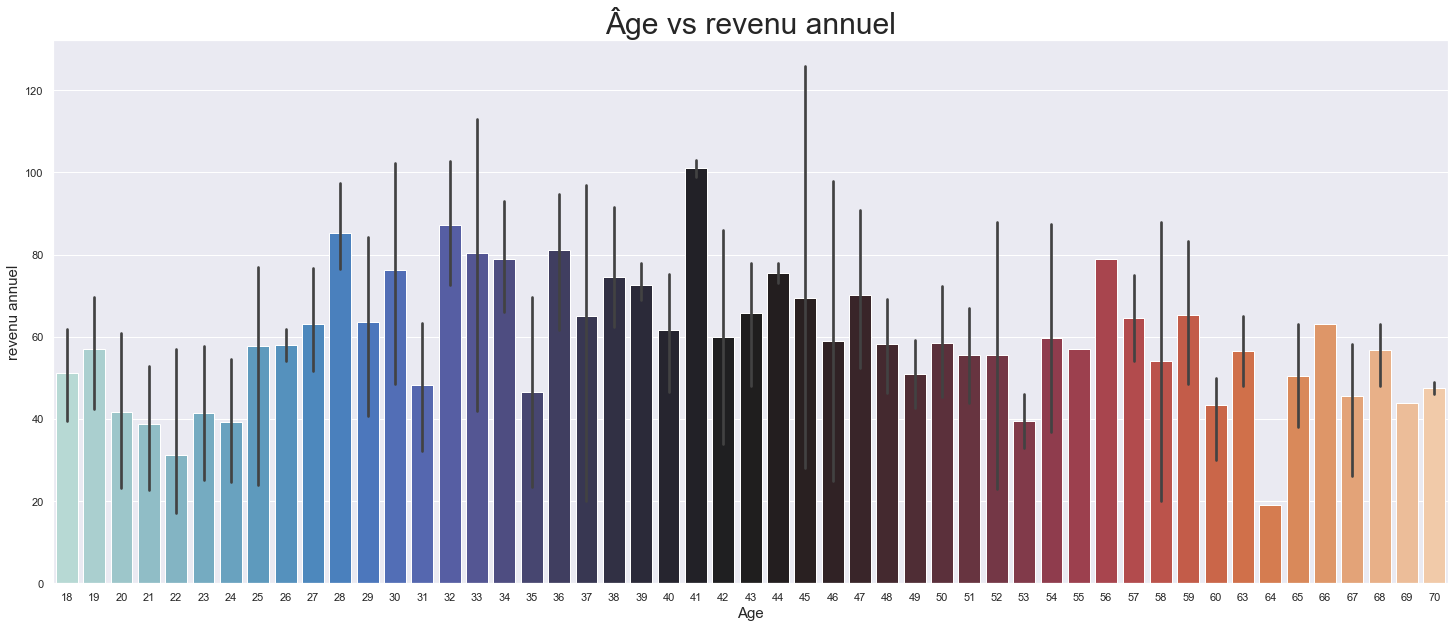

In [126]:
plt.figure(figsize=(25,10))
plt.title('Âge vs revenu annuel',fontsize = 20)
sns.barplot(x = data['Age'] , y = data['Annual Income (k$)'] ,palette='icefire')
plt.title("Âge vs revenu annuel",fontsize=30)
plt.xlabel("Age",fontsize=15)
plt.ylabel("revenu annuel",fontsize=15)
plt.show()

Le revenu annuel est maximum à 32 et 41 ans.

### <font color='blue'>Âge vs spending score</font>

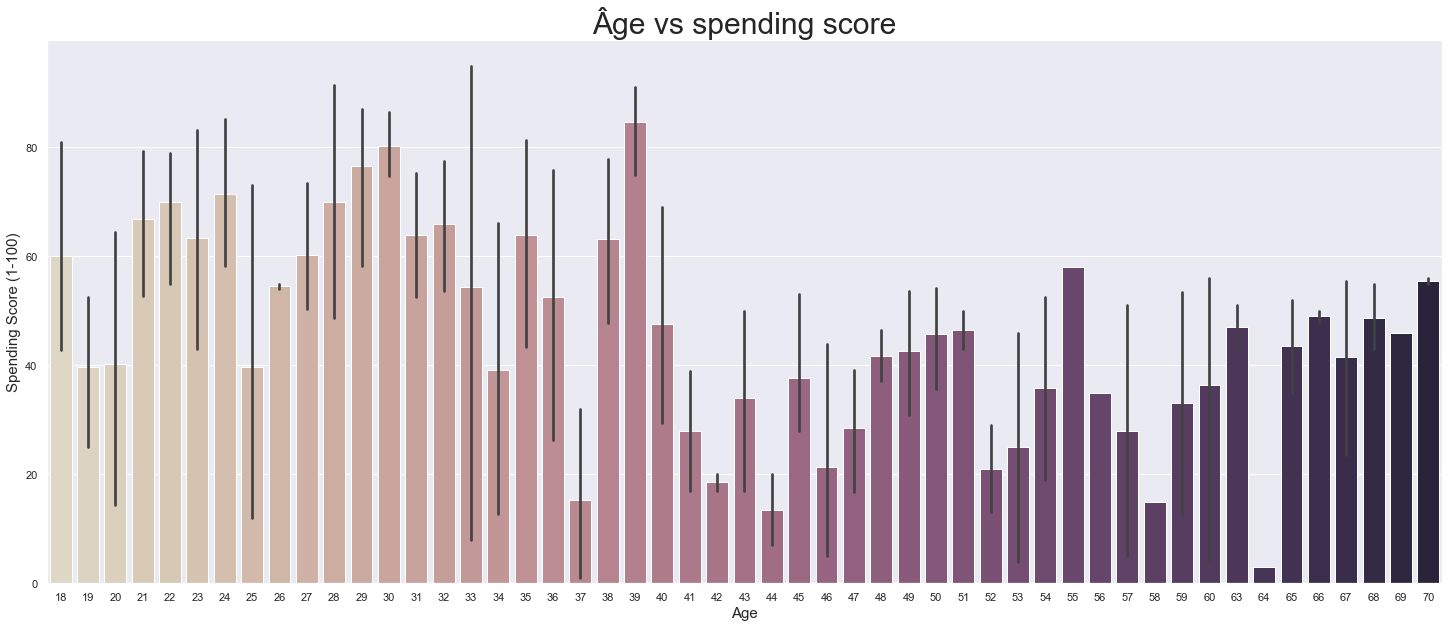

In [127]:
plt.figure(figsize=(25,10))
sns.barplot(y= "Spending Score (1-100)", x = "Age", data = data, palette="ch:s=-.2,r=.6")
plt.title("Âge vs spending score",fontsize=30)
plt.ylabel("Spending Score (1-100)",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.show()


Nous pouvons voir que les 28-39 ans obtiennent le spending score maximum et la raison en est que leur revenu annuel est très élevé.

### <font color='blue'>revenu annuel moyenne par rapport Spending Score</font>

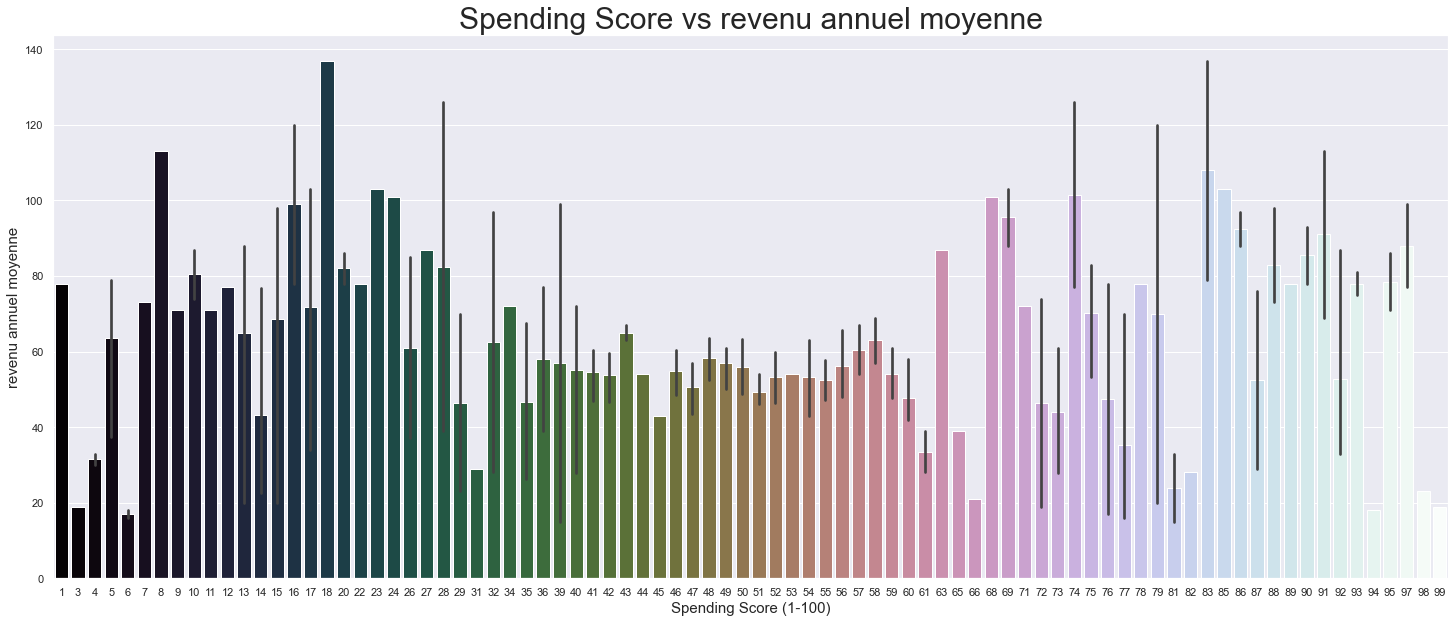

In [175]:
plt.figure(figsize=(25,10))
plt.title('Spending Score vs revenu annuel moyanne',fontsize = 20)
sns.barplot(x = data['Spending Score (1-100)'] , y = data['Annual Income (k$)'] ,palette='cubehelix')
plt.title("Spending Score vs revenu annuel moyenne",fontsize=30)
plt.xlabel("Spending Score (1-100)",fontsize=15)
plt.ylabel("revenu annuel moyenne",fontsize=15)
plt.show()

on remarque qu'il existe une catégorie des clients ont un Spending Score inferieur même si le le revenu annuel moyenne est plus élevé (par exemple : le Spending Score = 18 mais  le revenu annuel moyenne est  maximale)  

### <font color='blue'>Revenu annuel en fonction de l\'âge et du Spending Score</font>

/Users/mohammedherrag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mohammedherrag/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


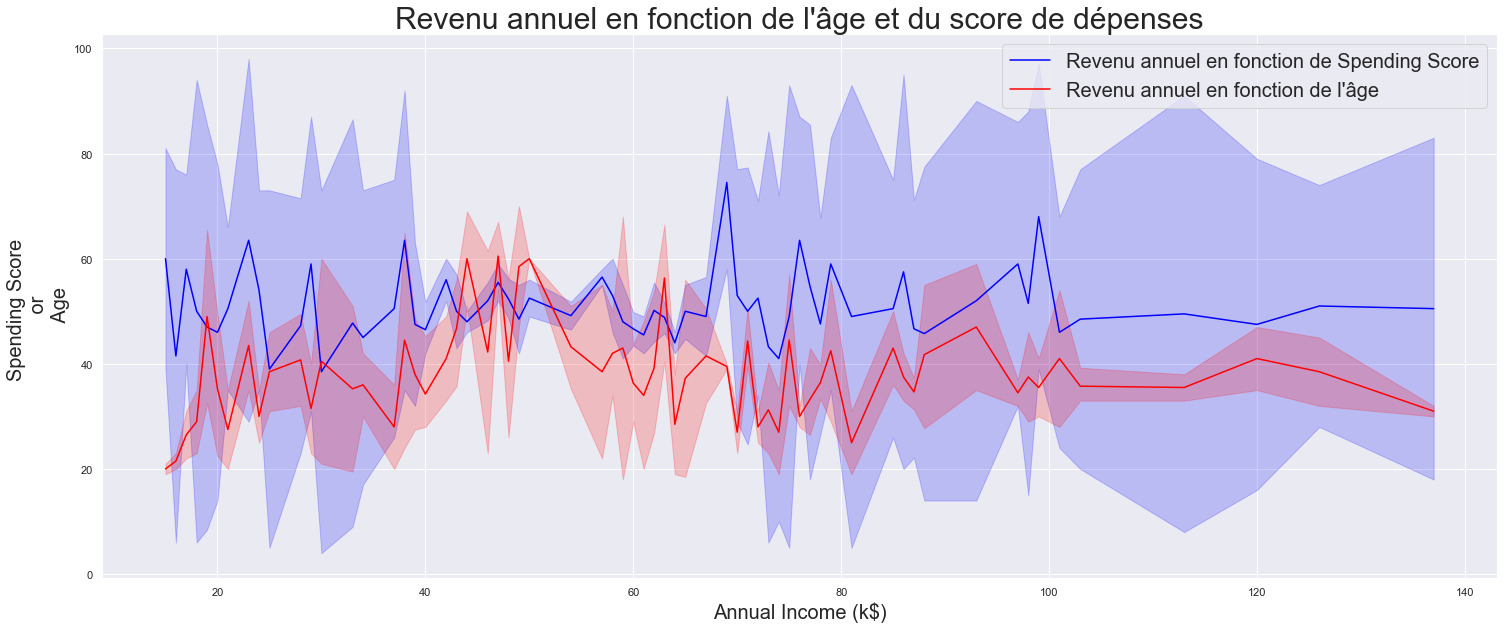

In [186]:
plt.figure(figsize=(25,10))
sns.lineplot('Annual Income (k$)','Spending Score (1-100)' ,
             color = 'blue', palette = 'Accent_r',data=data,label='Revenu annuel en fonction de Spending Score')

sns.lineplot('Annual Income (k$)','Age' , color = 'red',
             palette = 'Accent_r',data=data,label='Revenu annuel en fonction de l\'âge')

plt.title('Revenu annuel en fonction de l\'âge et du Spending Score', fontsize = 30)
plt.xlabel("Annual Income (k$)",fontsize=20)
plt.ylabel("Spending Score \n or\n Age",fontsize=20)
plt.legend(fontsize=20)
plt.show()


Le graphique ci-dessus montre comment l'âge et le Spending Score varient avec le revenu annuel.

### <font color='blue'></font>

### <font color='blue'> classification</font>

tout d’abord on centrer et réduit les données

In [191]:
data['Genre'].replace({'Male':1 , 'Female':0} , inplace = True)

In [192]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_scaled = sc.fit_transform(data)

In [206]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

print( f'PC1 :\t{pca.explained_variance_ratio_[0]*100}%')
print( f'PC2 :\t{pca.explained_variance_ratio_[1]*100}%')

PC1 :	33.69004557101256%
PC2 :	26.23064462718589%


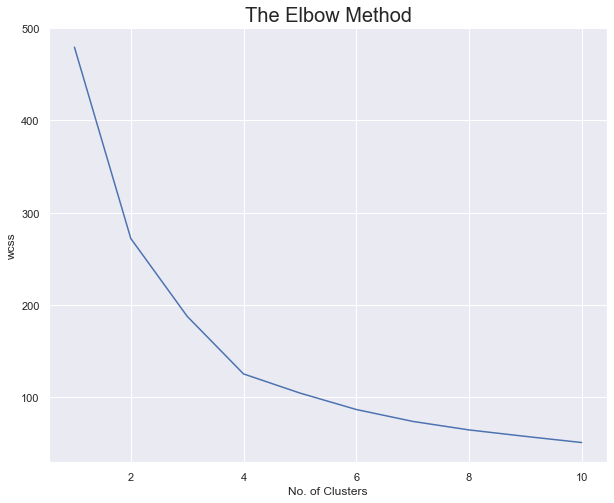

In [218]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 1998)
    km.fit(data_pca)
    wcss.append(km.inertia_)
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [273]:
result_data = pd.DataFrame(index=data.index)
result_data['PC1'] = data_pca[:,0]
result_data['PC2'] = data_pca[:,1]
result_data.head()

,PC1,PC2
CustomerID,,
1,-0.406383,-0.520714
2,-1.427673,-0.367310
3,0.050761,-1.894068
4,-1.694513,-1.631908
5,-0.313108,-1.810483


In [282]:
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1998)
y_means = km.fit_predict(result_data)

À partir de la formation ci-dessus, nous obtenons un total de 4 clusters sur l'ensemble de données.

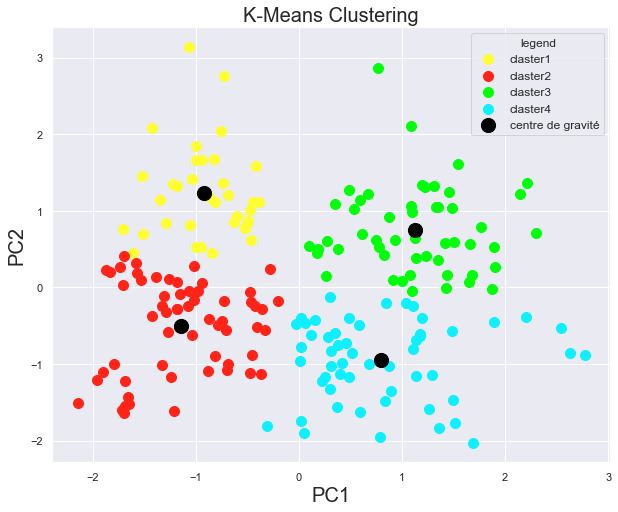

In [313]:
plt.figure(figsize=(10,8))

color={0:'#FFFE31',1:'#FF2318',2:'#00FF09',3:'#0DF0FF'}

for i in range(4):
    plt.scatter(result_data[y_means == i].iloc[:,0], result_data[y_means == i].iloc[:,1],
                s = 100, c =color[i] , label = f"claster{i+1}")
    
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 200,
            c = 'black' , label = 'centre de gravité') 

plt.title("K-Means Clustering" , fontsize = 20)
plt.xlabel("PC1" , fontsize = 20)
plt.ylabel("PC2" , fontsize = 20)
plt.legend(title='legend', loc='upper right',fontsize =12)

plt.show()

125.49372999335934